In [3]:
#reading the text file
input_file = open('chat.txt', 'r')

#taking the lines of the text file inside a list
all_lines = list()
for lines in input_file:
    all_lines.append(str(lines).strip("\n"))
    
print("Length: {}".format(len(all_lines)))

Length: 40489


In [4]:
import emoji

#function definition for removing emojis from a text
def demojify(input_text):
    output_text = ""
    for character in input_text:
        if character not in emoji.UNICODE_EMOJI:
            output_text += character
        else: continue
            
    return output_text

In [5]:
#reading all_lines list and creating another list (a refined one)
modified_all_lines = list()

for i in range(1, len(all_lines)):
    modified_all_lines.append(demojify(all_lines[i][20:]))

In [6]:
import string

#forming a new list of texts
final_lines = list()

for j in range(len(modified_all_lines)):
    index = modified_all_lines[j].find(':')
    final_lines.append(modified_all_lines[j][index+2:])

In [7]:
import re
from nltk.tokenize import word_tokenize 

#forming a list containing all words
all_words = list()

#removing urls (if any) from texts
for i in range(len(final_lines)):
    line = final_lines[i]
    reg_exp = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    if re.match(reg_exp, line):
        final_lines[i] = re.sub(reg_exp, '', final_lines[i], flags=re.MULTILINE)
    else:
        continue
        
#tokenizing the words from the sentences of the list
for line in final_lines:
    for tokens in word_tokenize(line):
        all_words.append(tokens)

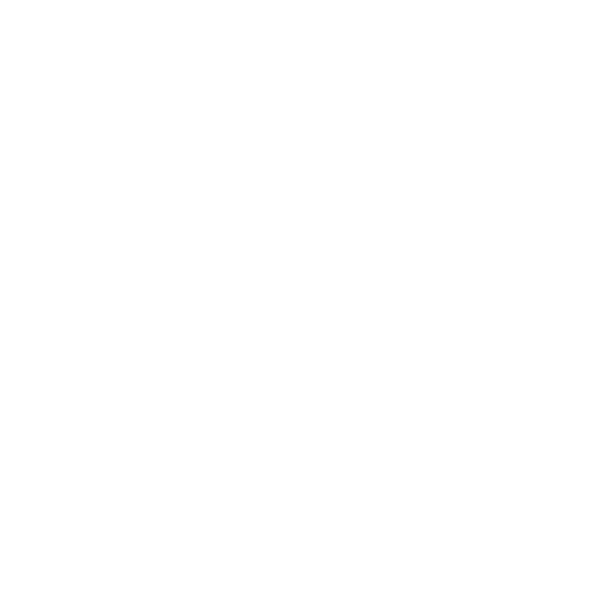

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 

#function definition to generate a WordCloud
def generateWordCloud(input_list):
    comment_words = ""
    for elements in input_list:
        tokens = elements.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
        
    wordcloud = WordCloud(width=800, height=800,
                          background_color="white",
                          min_font_size=10).generate(comment_words)
    
    #plotting the wordcloud image
    plt.figure(figsize = (8, 8), facecolor = None) 
    #plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
        
#generating the WordCloud
generateWordCloud(all_words)